# 소프트맥스
- 다중 클래스를 분류할 때 소프트맥스를 사용한다.
- Sigmoid는 이진분류
- Softmax는 다중분류 : 분류할 정답지에 확률로 뿌려줌

<b>1) 소프트맥스 함수 이해</b>
- 클래스가 k개(하기 수식은 3개)일 때 해당 클래스의 정답일 확률을 표시
- 총 이벤트 중 1번 클래스가 일어날 확률, 총 이벤트 중 2번 클래스가 일어날 확률...
- p1, p2, p3을 합하면 총합은 1이 된다.
![소프트맥스수식](https://github.com/tenjumh/GraduateSchool/blob/master/Study/NLP_Natural%20Language%20Processing/image/ML/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%EC%88%98%EC%8B%9D.PNG?raw=True)

<b>2) 소프트맥스 함수 그림 이해</b>
![소프트맥스그림](https://github.com/tenjumh/GraduateSchool/blob/master/Study/NLP_Natural%20Language%20Processing/image/ML/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%EA%B7%B8%EB%A6%BC.PNG?raw=True)
- 샘플 데이터를 1개씩 입력하고 해당 샘플데이터의 독립변수가 4개(x1, x2, x3, x4)로 4차원 벡터를 Input
- 3종류의 클래스로 분류해야 하기 때문에 3차원 벡터로 Output
- output은 원핫 벡터로 표현 예를 들어, [0.1, 0.7, 0.2]로 0.7인 2번째 인덱스가 정답일 때, [0, 1, 0]으로 출력해주는 것이 원핫 인코딩이다.<br>
![output one-hot](https://github.com/tenjumh/GraduateSchool/blob/master/Study/NLP_Natural%20Language%20Processing/image/ML/%EC%9B%90%ED%95%AB%EA%B7%B8%EB%A6%BC.PNG?raw=True)

- 소프트맥스 회귀를 벡터와 행렬 연산으로 이해
- 독립변수를 4개 가진 입력벡터 x, 3개 클래스로 구분된 출력력 예측값
![output one-hot](https://github.com/tenjumh/GraduateSchool/blob/master/Study/NLP_Natural%20Language%20Processing/image/ML/%EC%86%8C%ED%94%84%ED%8A%B8%EB%A7%A5%EC%8A%A4%ED%9A%8C%EA%B7%80%EC%97%B0%EC%82%B0.PNG?raw=True)

# 원-핫 벡터의 무작위성
- 그런데 3개의 클래스로 분류할 때 레이블을 원핫으로 하는 이유는 무엇인가?
- 레이블을 정수 인코딩을 사용하여 1, 2, 3으로 
![행렬](https://github.com/tenjumh/GraduateSchool/blob/master/Study/NLP_Natural%20Language%20Processing/image/ML/%EC%9B%90%ED%95%AB.PNG?raw=True)
- 위 식을 이용하여 실제값이 레이블 2인데 예측 레이블이 1일 경우 로스를 구하면<br>
    (2 - 1) ^ 2 = 1<br>
- 실제값이 레이블 3인데 예측 레이블이 1일 경우 로스를 구하면<br>
    (3 - 1) ^ 2 = 4<br>
- 이렇게 하면 2, 1사이의 오차보다 3, 1사이의 오차가 더 크기에 1에 대해 2는 3보다 더 가깝다고 할 수 있다. 그런데??? 정말인가<br>
- 이렇기 때문에 원핫 벡터를 쓰는 것이다.<br>
![행렬](https://github.com/tenjumh/GraduateSchool/blob/master/Study/NLP_Natural%20Language%20Processing/image/ML/%EC%9B%90%ED%95%AB%EA%B3%84%EC%82%B0.PNG?raw=True)
- 실제값이 레이블 1번 [1, 0, 0]인데 예측 레이블 2번 [0, 1, 0]인 경우와
- 실제값이 레이블 1번 [1, 0, 0]인데 예측 레이블 3번 [0, 0, 1]인 경우의 계산은 똑같이 2로 동일하다.
- <b>모든 클래스에 대해서 원-핫 인코딩을 통해 얻은 원-핫 벡터는 모든 쌍에 대해서 유클리드 거리가 동일하다.</b>
- <b>따라서 원-핫 벡터의 관계의 무작위성은 단어의 유사성을 구할 수 없는 단점도 있다.</b>

# Cost Function 비용함수
- 소프트맥스 회구에서 비용함수로는 크로스엔트로피 함수를 사용
- 크로스엔트로피<br>
<b>1) Cost Function 비용 함수</b>
https://github.com/tenjumh/GraduateSchool/blob/master/Study/%EA%B6%81%EA%B8%88%ED%95%9C%20%EA%B2%83%EB%93%A4%20%EB%AA%A8%EC%9D%8C/Cost%20Function_Cross%20Entropy.ipynb

# 소프트맥스 회귀
- iris를 통해서 실습해 본다.

In [41]:
import pandas as pd
data = pd.read_csv("C:/Users/fxk/PycharmProjects/tenjumh/Study/NLP_Natural Language Processing/data/iris.csv", encoding="latin1")

In [42]:
print(len(data))
print(data[:5])

150
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa


In [43]:
# Species 품종을 의미하면 몇가지 품종인 출력
print("품종 종류:", data["species"].unique(), sep="\n")
# .unique()는 중복을 허용하지 않고 모든 종류를 출력

품종 종류:
['setosa' 'versicolor' 'virginica']


- 입력데이터는 샘플당 4개의 특징 즉 독립변후를 가지고 3개의 품종 중 예측함
- 4개의 특성에 대한 3개의 품종에 대한 시각화

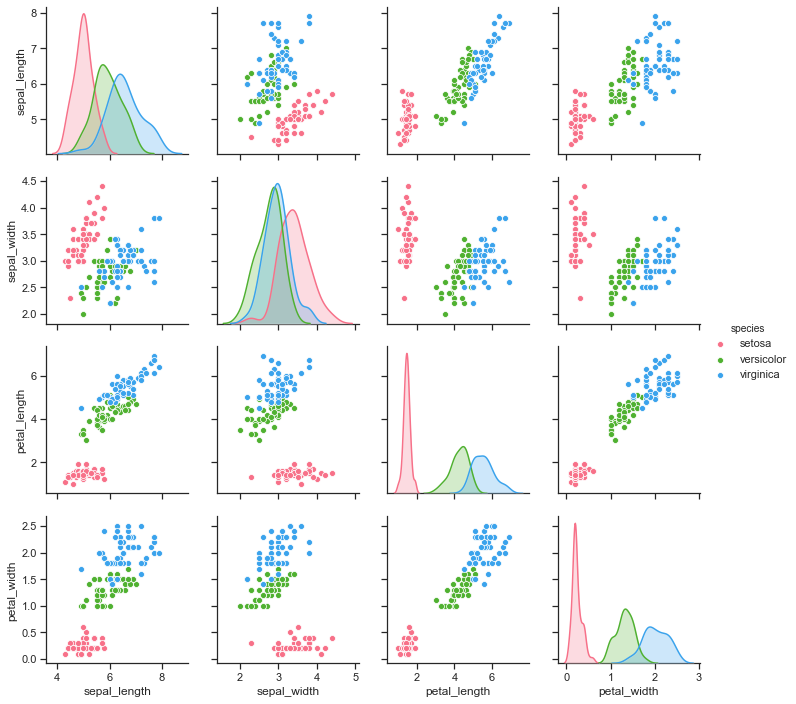

In [44]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(data, hue="species", palette="husl")

- pairplot은 데이터프레임을 인수로 받아 각 열의 조합에 따라서 산점도를 그림
- 즉 4개의 특성 모든 특성의 조합 4 X 4 = 16개의 산점도

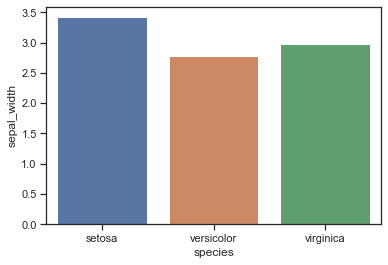

In [45]:
sns.barplot(data['species'], data['sepal_width'], ci=None)

- barplot을 통해 종과 특성에 대한 연관관계 출력

In [46]:
import matplotlib.pyplot as plt
data['species'].value_counts()#.plot(kind='bar')

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

- .value_counts는 해당 특성에 대한 값의 개수
- 추가로 .plot(kind='??')를 하면 해당 종류의 그래프로 그려줌<br>

<br>
<b>소프트맥스 회귀 모델 학습을 위해 전처리</b><br>
1) species열에 대한 수치화<br>
    - 정수 인코딩 후 원-한 인코딩 수행

In [47]:
data['species'] = data['species'].replace(['setosa', 'versicolor', 'virginica'], [0, 1, 2])
data['species'].value_counts()#.plot(kind='bar')
# .replace([A], [B])는 변경

2    50
1    50
0    50
Name: species, dtype: int64

In [48]:
print(data[:4])

   sepal_length  sepal_width  petal_length  petal_width  species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0


In [49]:
# 특성과 품종을 각각 종속 변수와 독립변수 데이터로 분리 작업
from sklearn.model_selection import train_test_split
data_X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
# X 데이터 정의
data_Y = data['species'].values

print(data_X[:5])
print(data_Y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[0 0 0 0 0]


- Training / Test 데이터 분리 및 One-Hot 인코딩 수행

In [50]:
(X_train, X_test, y_train, y_test) = train_test_split(data_X, data_Y, train_size=0.8, random_state=1)
# 훈련 데이터와 테스트 데이터를 8:2로 나눕니다. 또한 데이터의 순서를 섞는다.

In [51]:
from tensorflow.keras.utils import to_categorical
# 원-핫 인코딩
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print(y_train[:5])
print(y_test[:5])

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]]


---------------------------------전처리 완료----------------------------------

In [65]:
from tensorflow.keras.models import Sequential   # 케라스의 Sequential() 임포트
from tensorflow.keras.layers import Dense   # 케라스의 Dense() 임포트
from tensorflow.keras import optimizers   # 케라스의 옵티마이저 임포트

model = Sequential()
model.add(Dense(3, input_dim=4, activation='softmax'))
sgd = optimizers.SGD(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# 오비마이져는 "adam"
# loss function은 크로스엔트로피
history = model.fit(X_train, y_train, batch_size=1, epochs=200, validation_data=(X_test, y_test))
# X, y 데이터에 대해서 오차를 최소화하는 작업을 200번 실행

Train on 120 samples, validate on 30 samples
Epoch 1/200
120/120 [==============================] - 1s 5ms/step - loss: 6.2363 - acc: 0.3250 - val_loss: 4.4654 - val_acc: 0.3667
Epoch 2/200
120/120 [==============================] - 0s 1ms/step - loss: 4.3968 - acc: 0.3250 - val_loss: 2.8326 - val_acc: 0.3667
Epoch 3/200
120/120 [==============================] - 0s 1ms/step - loss: 2.8097 - acc: 0.3250 - val_loss: 1.6878 - val_acc: 0.3667
Epoch 4/200
120/120 [==============================] - 0s 1ms/step - loss: 1.8230 - acc: 0.3250 - val_loss: 1.1470 - val_acc: 0.4333
Epoch 5/200
120/120 [==============================] - 0s 1ms/step - loss: 1.1682 - acc: 0.4167 - val_loss: 0.8461 - val_acc: 0.5333
Epoch 6/200
120/120 [==============================] - 0s 2ms/step - loss: 0.7984 - acc: 0.6083 - val_loss: 0.7509 - val_acc: 0.7667
Epoch 7/200
120/120 [==============================] - 0s 2ms/step - loss: 0.6766 - acc: 0.8417 - val_loss: 0.7321 - val_acc: 0.6667
Epoch 8/200
120/120 [===

Epoch 62/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3382 - acc: 0.9583 - val_loss: 0.4153 - val_acc: 0.7000
Epoch 63/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3353 - acc: 0.9500 - val_loss: 0.4057 - val_acc: 0.8333
Epoch 64/200
120/120 [==============================] - 0s 2ms/step - loss: 0.3336 - acc: 0.9417 - val_loss: 0.4119 - val_acc: 0.7000
Epoch 65/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3305 - acc: 0.9500 - val_loss: 0.4006 - val_acc: 0.8333
Epoch 66/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3261 - acc: 0.9583 - val_loss: 0.3970 - val_acc: 0.8333
Epoch 67/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3249 - acc: 0.9417 - val_loss: 0.4012 - val_acc: 0.7333
Epoch 68/200
120/120 [==============================] - 0s 1ms/step - loss: 0.3211 - acc: 0.9500 - val_loss: 0.3831 - val_acc: 0.8333
Epoch 69/200
120/120 [==============================] - 0s 1ms

Epoch 123/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2209 - acc: 0.9750 - val_loss: 0.2936 - val_acc: 0.9000
Epoch 124/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2191 - acc: 0.9750 - val_loss: 0.2876 - val_acc: 0.9000
Epoch 125/200
120/120 [==============================] - 0s 2ms/step - loss: 0.2173 - acc: 0.9750 - val_loss: 0.2893 - val_acc: 0.9000
Epoch 126/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2162 - acc: 0.9750 - val_loss: 0.2736 - val_acc: 0.9333
Epoch 127/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2160 - acc: 0.9667 - val_loss: 0.2672 - val_acc: 0.9667
Epoch 128/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2153 - acc: 0.9750 - val_loss: 0.2748 - val_acc: 0.9333
Epoch 129/200
120/120 [==============================] - 0s 1ms/step - loss: 0.2140 - acc: 0.9750 - val_loss: 0.2704 - val_acc: 0.9333
Epoch 130/200
120/120 [==============================] 

120/120 [==============================] - 0s 1ms/step - loss: 0.1659 - acc: 0.9750 - val_loss: 0.2234 - val_acc: 0.9333
Epoch 184/200
120/120 [==============================] - 0s 2ms/step - loss: 0.1655 - acc: 0.9750 - val_loss: 0.2124 - val_acc: 0.9667
Epoch 185/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1644 - acc: 0.9750 - val_loss: 0.2136 - val_acc: 0.9667
Epoch 186/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1632 - acc: 0.9750 - val_loss: 0.2139 - val_acc: 0.9667
Epoch 187/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1633 - acc: 0.9750 - val_loss: 0.2119 - val_acc: 0.9667
Epoch 188/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1624 - acc: 0.9750 - val_loss: 0.2093 - val_acc: 0.9667
Epoch 189/200
120/120 [==============================] - 0s 1ms/step - loss: 0.1618 - acc: 0.9833 - val_loss: 0.2226 - val_acc: 0.9333
Epoch 190/200
120/120 [==============================] - 0s 1ms/step 

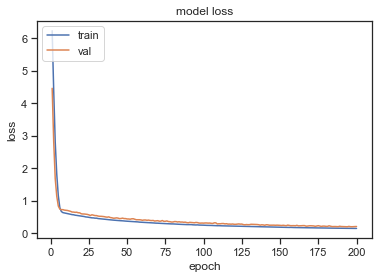

In [68]:
# 그래프 출력
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [69]:
print("\n 테스트 정확도: %.4f"%(model.evaluate(X_test, y_test)[1]))

30/30 [==============================] - 0s 169us/step

 테스트 정확도: 0.9333
